# Campus Recruitment Analysis of a class

### By Sanath P Kanchan

### Problem statement

##### This data set consists of Placement data of students in a XYZ campus. It includes secondary and higher secondary school percentage and specialization. It also includes degree specialization, type and Work experience and salary offers to the placed students

##### Questions
- Which factor influenced a candidate in getting placed?
- 
Does percentage matters for one to get placed
- 
Which degree specialization is much demanded by corporat
- conduct all statistical Analysis.e?

In [55]:
#importing the libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
#Readinging the data
df = pd.read_csv("Placement_Data_Full_Class.csv", index_col = "sl_no")
df.head(10)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0


In [3]:
df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 215 entries, 1 to 215
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 25.2+ KB


In [11]:
df.shape

(215, 14)

#### Checking null values in the dataset

In [5]:
df.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

There are no null values in the dataset other than salary column,Which can be treated by putting zero. Because there are few student who are not placed yet and their salary will be 0. 

#### Treating null values

In [6]:
df.salary = df.salary.fillna(0)

In [7]:
df.salary.isnull().sum()

0

There are no null values in the dataset.

### Detecting outlinears

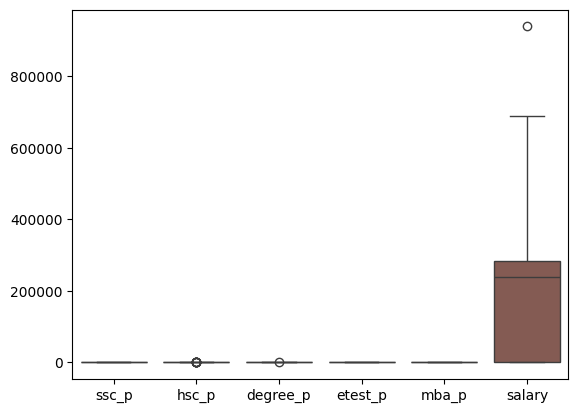

In [8]:
sns.boxplot(df);

Seems like there are few outlinears in "hsc_p" , "degree_p" and "salary". We will look into them one by one.

#### Outliners in ssc_p colums

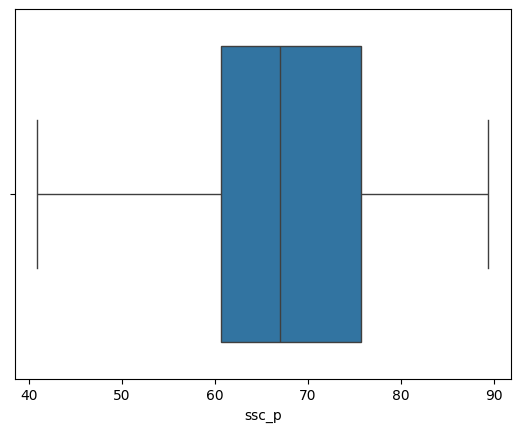

In [9]:
sns.boxplot(x = df.ssc_p);

We can see there are no outlinears in ssc_p

#### Outliners in hsc_p colums

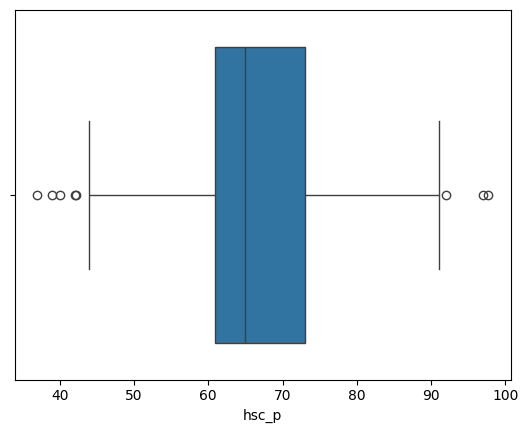

In [10]:
sns.boxplot(x = df.hsc_p);

We can see there are few outliners, Let's look into it

lets first find out the minimum and maximun values according to the plot.

In [11]:
min = 60.900000 - 1.5*(73.000000-  60.900000)
max = 83.500000 + 1.5*(83.500000-  60.900000)
print("Max: ", max)
print("Min: ", min)


Max:  117.4
Min:  42.75


As we can see the outlinear present just shows that there are few students who have obtained the precentage less that min 42.75% and few who had performed extermely well and obtained percentage above 91.15%. So there is no need to treat the outliners here.

In [12]:
df[df.hsc_p < 42.75]

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
43,M,49.00,Others,39.00,Central,Science,65.00,Others,No,63.00,Mkt&Fin,51.21,Not Placed,0.0
50,F,50.00,Others,37.00,Others,Arts,52.00,Others,No,65.00,Mkt&HR,56.11,Not Placed,0.0
121,M,58.00,Others,40.00,Others,Science,59.00,Comm&Mgmt,No,73.00,Mkt&HR,58.81,Not Placed,0.0
170,M,59.96,Others,42.16,Others,Science,61.26,Sci&Tech,No,54.48,Mkt&HR,65.48,Not Placed,0.0
207,M,41.00,Central,42.00,Central,Science,60.00,Comm&Mgmt,No,97.00,Mkt&Fin,53.39,Not Placed,0.0


In [13]:
df[df.hsc_p > 91.15]

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
25,M,76.50,Others,97.7,Others,Science,78.86,Sci&Tech,No,97.4,Mkt&Fin,74.01,Placed,360000.0
135,F,77.44,Central,92.0,Others,Commerce,72.00,Comm&Mgmt,Yes,94.0,Mkt&Fin,67.13,Placed,250000.0
178,F,73.00,Central,97.0,Others,Commerce,79.00,Comm&Mgmt,Yes,89.0,Mkt&Fin,70.81,Placed,650000.0


#### Outliners in degree_p column

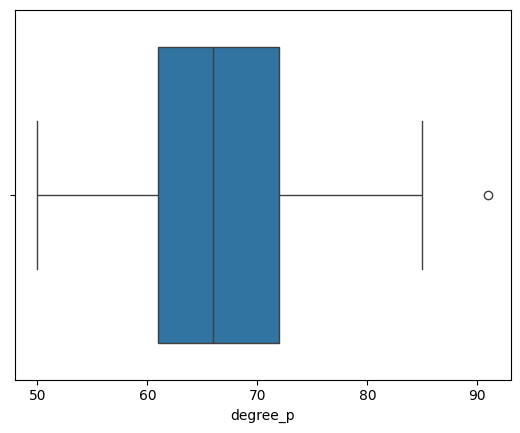

In [14]:
sns.boxplot(x = df.degree_p);

In [15]:
print("Max: ", 72.000000 + 1.5*(72.000000-  61.000000))

Max:  88.5


In [16]:
df[df.degree_p > (72.000000 + 1.5*(72.000000-  61.000000))]

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
198,F,83.96,Others,53.0,Others,Science,91.0,Sci&Tech,No,59.32,Mkt&HR,69.71,Placed,260000.0


As seen in the above boxplot there is only one outliners which can be ignored. There is just one student who has performed very well and scored 91%. So we can ignore this outliners.

#### Outliners in etest_p

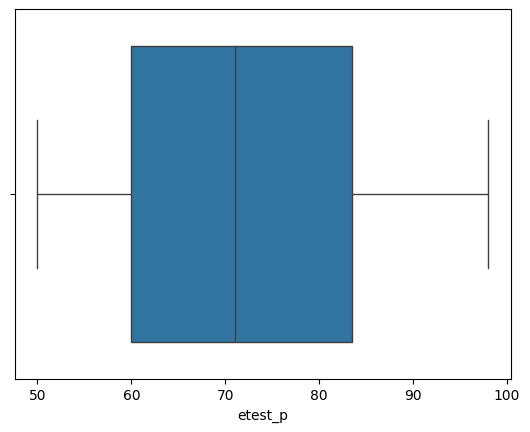

In [17]:
sns.boxplot(x = df.etest_p);

We can see there are no outliners

#### Outliners in mba_p

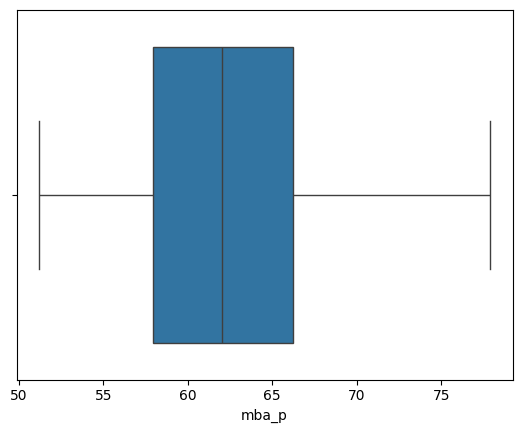

In [18]:
sns.boxplot(x = df.mba_p);

We can not see any outliners

#### Outliners in salary 

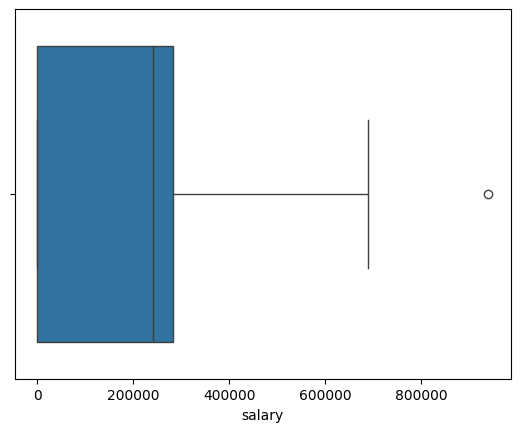

In [19]:
sns.boxplot(x = df.salary);

In [20]:
(300000 +1.5*(300000 - 0))

750000.0

In [21]:
df[df.salary > (300000 +1.5*(300000 - 0))]

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
120,M,60.8,Central,68.4,Central,Commerce,64.6,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34,Placed,940000.0


We can that there is only one outliners and it shows that there is one student who has salary 940000. It is a useful information so let's not deal with it

Let's check the coorelation of the variables in the dataset

In [22]:
df[["ssc_p", "hsc_p", "degree_p", "etest_p", "mba_p", "salary"]].corr()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.000000,0.511472,0.538404,0.261993,0.388478,0.538090
hsc_p,0.511472,1.000000,0.434206,0.245113,0.354823,0.452569
degree_p,0.538404,0.434206,1.000000,0.224470,0.402364,0.408371
etest_p,0.261993,0.245113,0.224470,1.000000,0.218055,0.186988
mba_p,0.388478,0.354823,0.402364,0.218055,1.000000,0.139823
salary,0.538090,0.452569,0.408371,0.186988,0.139823,1.000000


<Axes: >

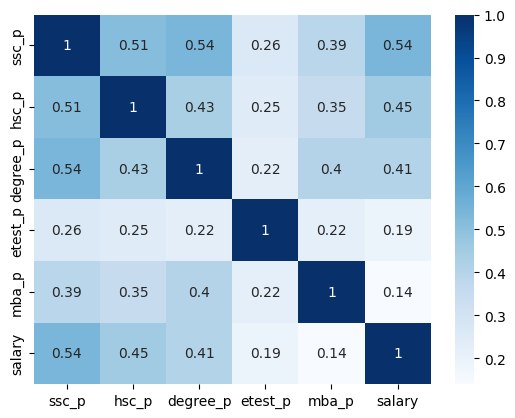

In [23]:
sns.heatmap(df[["ssc_p", "hsc_p", "degree_p", "etest_p", "mba_p", "salary"]].corr(), annot = True,  cmap = 'Blues')

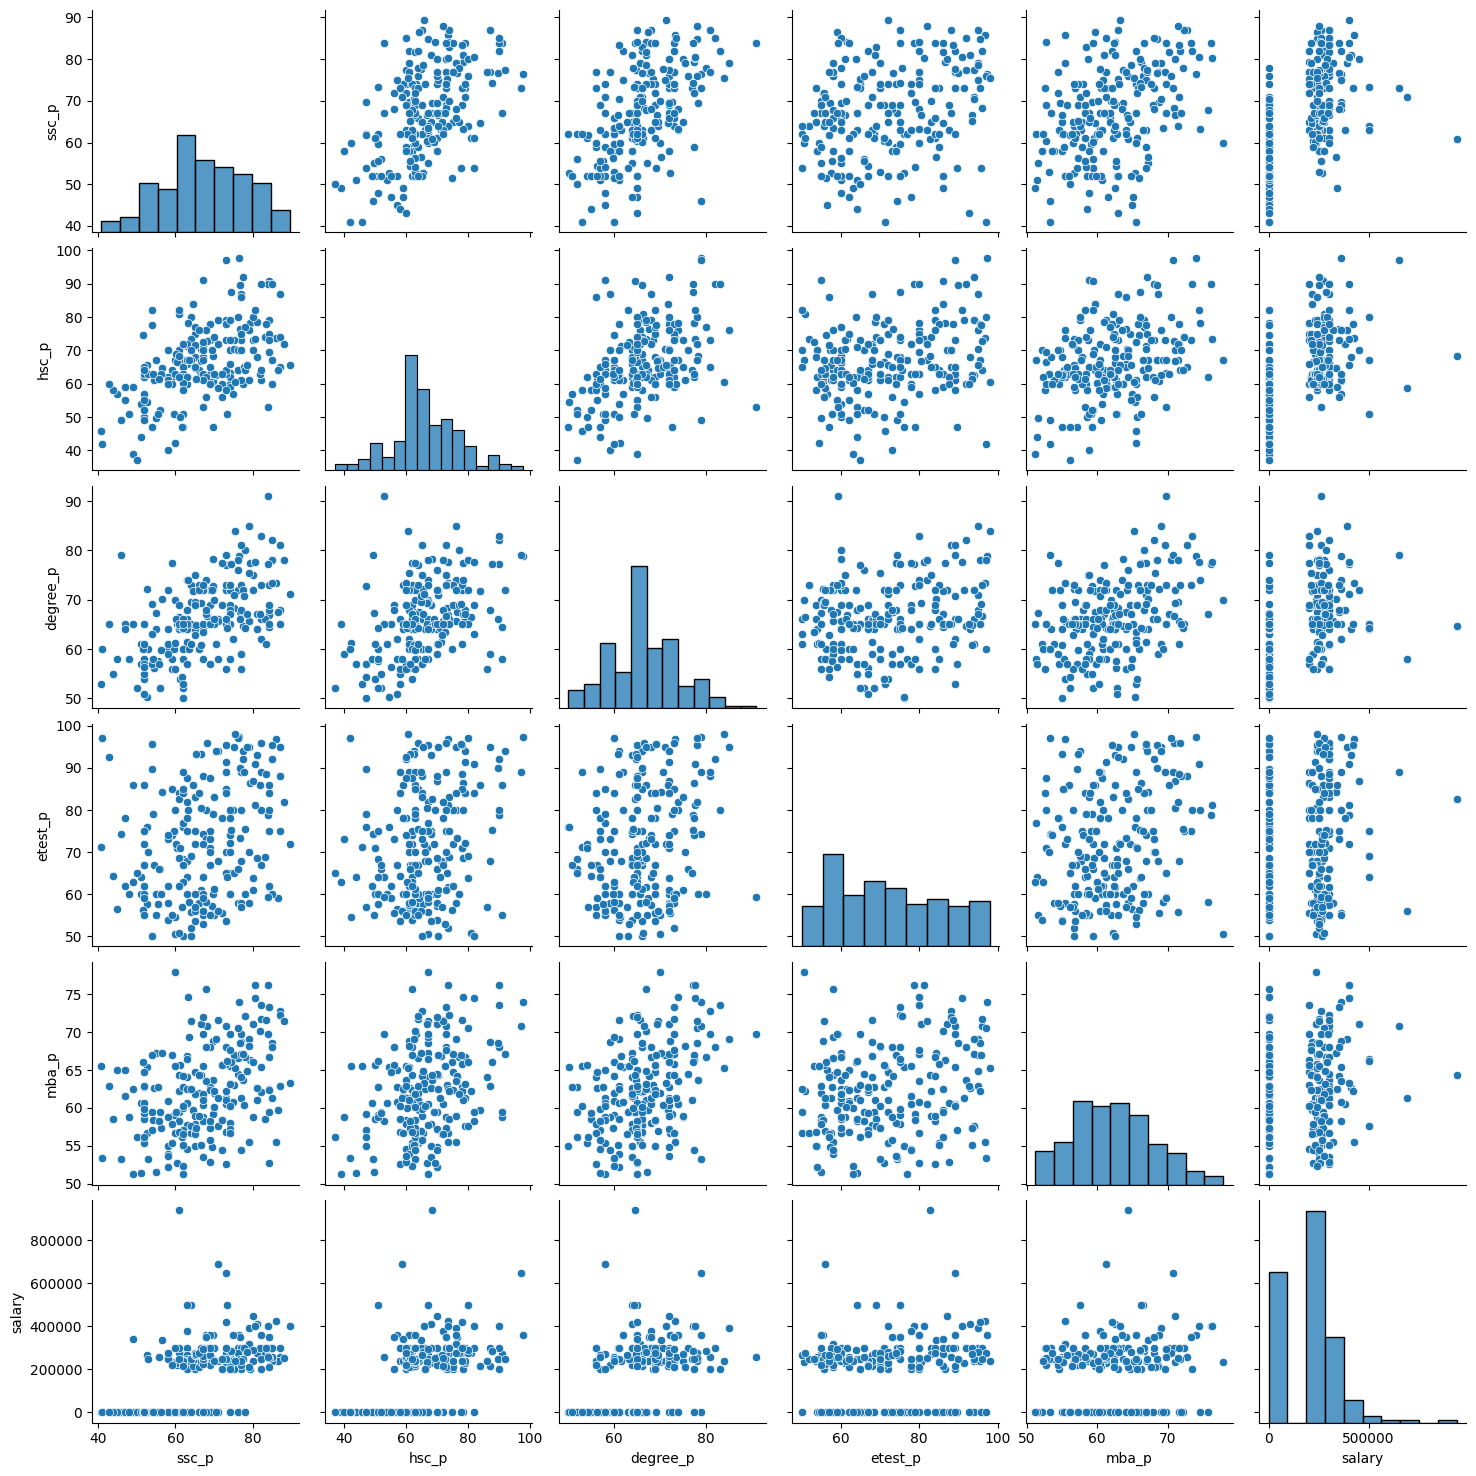

In [24]:
sns.pairplot(df);

Based on the correlation matrix heatmap and pairplot, here are some insights with salary as the target variable:

 - Strong Positive Correlation: The salary has a strong positive correlation with ssc_p (0.54). This suggests that as the ssc_p score increases, the salary tends to increase a.

- Weak Positive Correlation: The salary has a weak positive correlation with and mba_P (0.22). This indicates that there might be a slight increase in salary with an increase in and mba_P, but the relationship is not very str
- Correlation Coefficients: Looking at the correlation coefficients between salary and other variables, we see that the highest correlation is with SSC percentage (0.538090), followed by HSC percentage (0.452569) and degree percentage (0.408371). This suggests that there is a moderate to strong positive correlation between academic performance and saary 
- 
-Academic Performance Impact: The correlation coefficients indicate that academic performance at different levels (SSC, HSC, and degree) does have an impact on the salary one receives. This implies that individuals with higher academic scores tend to command higheryari 
- 

-MBA Performance: The correlation coefficient between MBA performance and salary is 0.139823, indicating a weak positive correlation. This suggests that while having an MBA might be beneficial for salary, its impact might not be as pronounced as academic performance at lower levels.ong.

### Analysis of salary and status based on degree_t (Under Graduation(Degree type)- Field of degree education)

In [25]:
# Unique values of degree_t
df.degree_t.value_counts()

degree_t
Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: count, dtype: int64

#### Analysis of Commerce students in Degree

In [26]:
df_comm = df[df.degree_t == "Comm&Mgmt"]
df_comm.head(10)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
3,M,65.0,Central,68.0,Central,Arts,64.0,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
5,M,85.8,Central,73.6,Central,Commerce,73.3,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
7,F,46.0,Others,49.2,Others,Commerce,79.0,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,0.0
9,M,73.0,Central,79.0,Central,Commerce,72.0,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0
10,M,58.0,Central,70.0,Central,Commerce,61.0,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,0.0
11,M,58.0,Central,61.0,Central,Commerce,60.0,Comm&Mgmt,Yes,62.00,Mkt&HR,60.85,Placed,260000.0
12,M,69.6,Central,68.4,Central,Commerce,78.3,Comm&Mgmt,Yes,60.00,Mkt&Fin,63.70,Placed,250000.0
13,F,47.0,Central,55.0,Others,Science,65.0,Comm&Mgmt,No,62.00,Mkt&HR,65.04,Not Placed,0.0
14,F,77.0,Central,87.0,Central,Commerce,59.0,Comm&Mgmt,No,68.00,Mkt&Fin,68.63,Placed,218000.0


In [27]:
df_comm.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,65.955586,67.185379,66.203103,71.985241,61.865379,196000.000000
std,10.444726,10.436509,7.304780,13.375798,5.744348,148685.536919
min,40.890000,40.000000,50.000000,50.000000,51.290000,0.000000
25%,60.230000,61.400000,60.900000,60.000000,57.340000,0.000000
50%,65.000000,66.600000,66.000000,70.000000,61.580000,240000.000000
75%,74.000000,73.200000,71.930000,83.000000,65.560000,276000.000000
max,87.000000,97.000000,85.000000,97.000000,77.890000,940000.000000


We can see that the max average salary of commerce degree students are 940000 and 196000.

In [28]:
df_comm.status.value_counts()

status
Placed        102
Not Placed     43
Name: count, dtype: int64

Out of 145 commerce students 102 were placed and 43 were not placed

In [29]:
status_count = df_comm.status.value_counts()

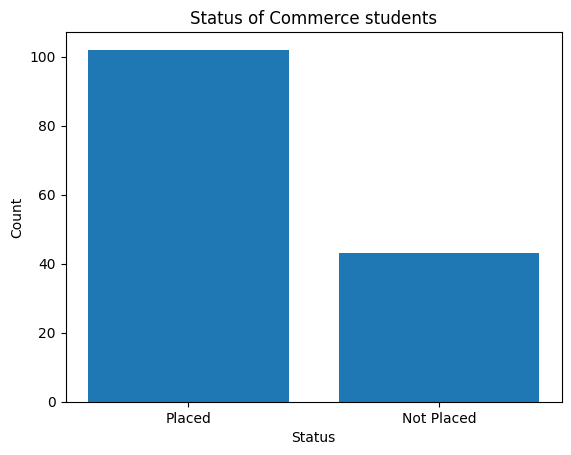

In [30]:
status_countdf = pd.DataFrame(status_count)
status_countdf.reset_index(inplace=True)
plt.bar(status_countdf["status"], status_countdf["count"])
plt.xlabel("Status")
plt.ylabel("Count")
plt.title("Status of Commerce students");


In [31]:
df_comm.specialisation.value_counts()

specialisation
Mkt&Fin    86
Mkt&HR     59
Name: count, dtype: int64

### Analysing commerce student data based on specialistion

In [32]:
mktfin_count = df_comm[(df_comm["specialisation"] == "Mkt&Fin") & (df_comm["status"] == "Placed")].shape[0]
mkthr_count = df_comm[(df_comm["specialisation"] == "Mkt&HR") & (df_comm["status"] == "Placed")].shape[0]

In [33]:
if mktfin_count > mkthr_count:
    print("Mkt&Fin specialization has more students placed.")
    max_salary_student = df_comm[(df_comm["specialisation"] == "Mkt&Fin") & (df_comm["status"] == "Placed")].salary.max()
else:
    print("Mkt&HR specialization has more students placed.")
    max_salary_student = df_comm[(df_comm["specialisation"] == "Mkt&HR") & (df_comm["status"] == "Placed")].salary.max()

print("The max Salary of the student is" ,max_salary_student)

Mkt&Fin specialization has more students placed.
The max Salary of the student is 940000.0


#### Analysis of Science students

In [34]:
df_science = df[df.degree_t == "Sci&Tech"]
df_science.head(10)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,0.0
6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,0.0
8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
23,F,69.80,Others,60.80,Others,Science,72.23,Sci&Tech,No,55.53,Mkt&HR,68.81,Placed,360000.0
24,F,77.40,Others,60.00,Others,Science,64.74,Sci&Tech,Yes,92.00,Mkt&Fin,63.62,Placed,300000.0
25,M,76.50,Others,97.70,Others,Science,78.86,Sci&Tech,No,97.40,Mkt&Fin,74.01,Placed,360000.0
32,F,67.00,Central,53.00,Central,Science,65.00,Sci&Tech,No,64.00,Mkt&HR,58.32,Not Placed,0.0


In [35]:
df_science.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,71.189322,65.385593,67.844237,72.310508,63.461186,218627.118644
std,10.694473,10.937903,7.014202,13.782281,5.916242,168078.891401
min,49.000000,42.160000,52.000000,50.000000,51.580000,0.000000
25%,63.500000,60.000000,64.240000,59.660000,59.425000,0.000000
50%,72.000000,64.000000,66.000000,71.000000,62.560000,250000.000000
75%,79.665000,71.500000,72.055000,85.000000,67.520000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,76.260000,690000.000000


We can see that max salary of science students is 690000 and average salary is 218627.11

In [57]:
df_science.status.value_counts()

status
Placed        41
Not Placed    18
Name: count, dtype: int64

In [56]:
status_countdf = df_science.status.value_counts()

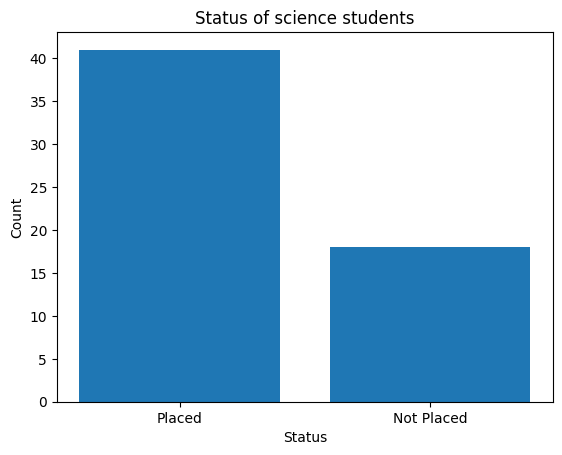

In [37]:
status_science = pd.DataFrame(status_countdf)
status_science.reset_index(inplace = True)
plt.bar(status_science["status"], status_science["count"])
plt.xlabel("Status")
plt.ylabel("Count")
plt.title("Status of science students");

In [38]:
df_science.specialisation.value_counts()

specialisation
Mkt&Fin    30
Mkt&HR     29
Name: count, dtype: int64

### Analysing science student data based on specialistion

In [39]:
mktfin_count1 = df_science[(df_science["specialisation"] == "Mkt&Fin") & (df_science["status"] == "Placed")].shape[0]
mkthr_count1 = df_science[(df_science["specialisation"] == "Mkt&HR") & (df_science["status"] == "Placed")].shape[0]

In [40]:
if mktfin_count1 > mkthr_count1:
    print("Mkt&Fin specialization has more students placed.")
    max_salary_student = df_science[(df_science["specialisation"] == "Mkt&Fin") & (df_science["status"] == "Placed")].salary.max()
else:
    print("Mkt&HR specialization has more students placed.")
    max_salary_student = df_science[(df_science["specialisation"] == "Mkt&HR") & (df_science["status"] == "Placed")].salary.max()

print("The max Salary of the student is" ,max_salary_student)

Mkt&Fin specialization has more students placed.
The max Salary of the student is 690000.0


## Analysis based on percentage (MBA and Degree)

### Let's check if MBA percentage affects placement or not

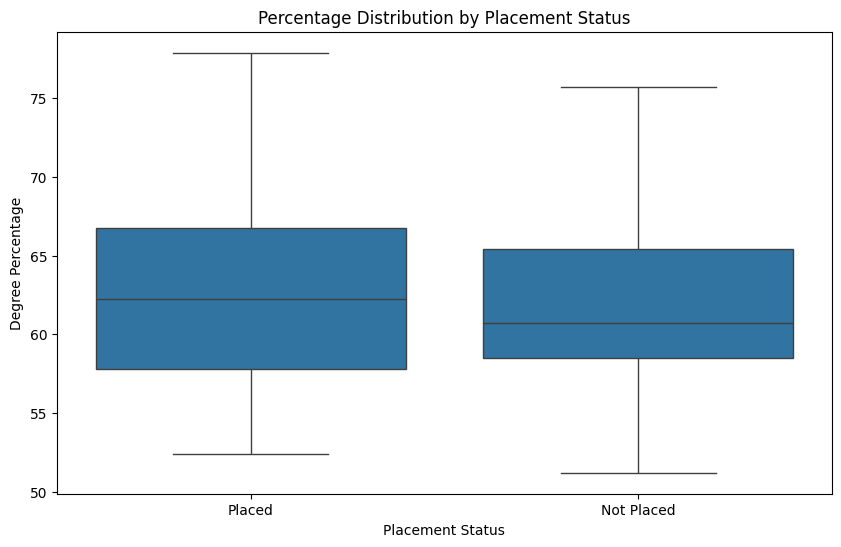

In [41]:
# Visualize mba percentage distribution for placed and not placed students
plt.figure(figsize=(10, 6))
sns.boxplot(x='status', y='mba_p', data=df)
plt.title('Percentage Distribution by Placement Status')
plt.xlabel('Placement Status')
plt.ylabel('Degree Percentage');

The above graph shows "Placed" and "Not Placed" with percentage in MBA. The Median percentage of those placed is slighty higher than those not placed. This suggests that the individuals who were placed generally had a higher percentage in MBA.


### Let's check if Degree percentage affects placement or not

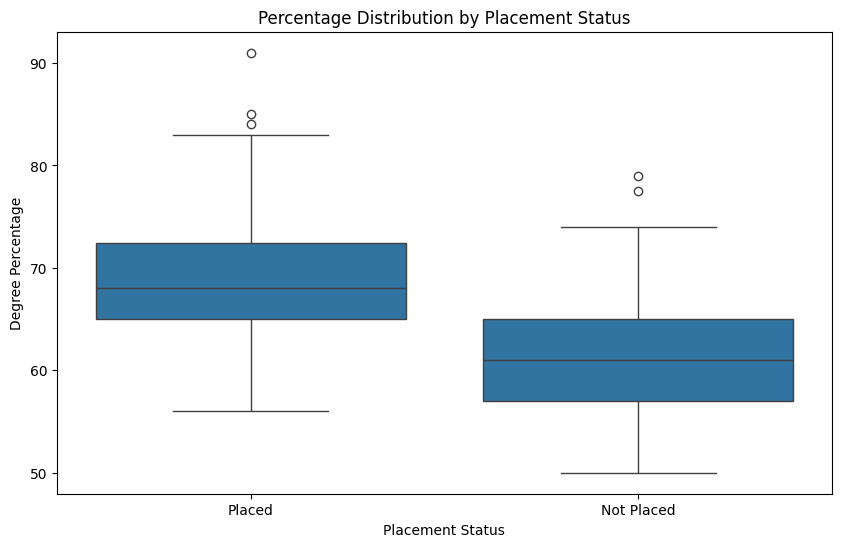

In [42]:
# Visualize degree percentage distribution for placed and not placed students
plt.figure(figsize=(10, 6))
sns.boxplot(x='status', y='degree_p', data=df)
plt.title('Percentage Distribution by Placement Status')
plt.xlabel('Placement Status')
plt.ylabel('Degree Percentage');

We can see that the median degree percentage for placed students is higher than for those not placed.This suggests that while a higher degree percentage might increase the chances of placement

### Let's check if MBA percentage affects Salary

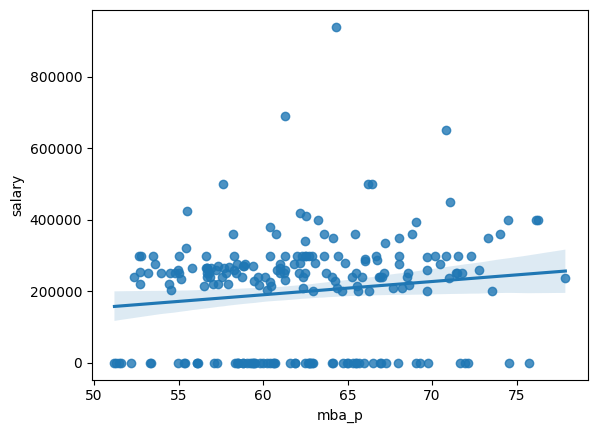

In [43]:
sns.regplot(x = df.mba_p , y = df.salary);

From the above scatter plot we can see that there is positive correlation between Salary and mba_p. However there is significant amont of variance in the data. Many data points are clustered around the lower end of the salary scale, incidating that many individuals with varying "mba_p" scores have similar salaries. Fewer data points are scattered at higher salaries, showing less consistency in salary as percentage in MBA (mba_p) increases.

### Let's check if Degree Percentage affects Salary

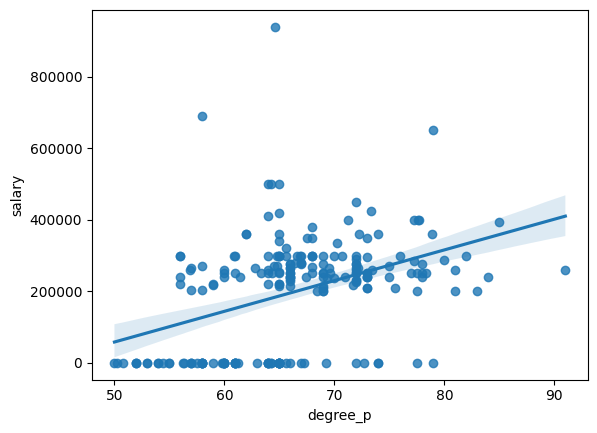

In [44]:
sns.regplot(x = 'degree_p', y = 'salary', data = df);

As “degree_p” increases, the salary also tends to increase. This suggests that individuals with higher “degree_p” values, perhaps indicating higher degrees or better performance in their degree, tend to have higher salaries. However there is variance in data. There are several outliers in the data where individuals have high “degree_p” but relatively low salary, or vice versa.

## Analysis by Work Experience and Specialization

### Let's check which specialization is more demanded by cooperate

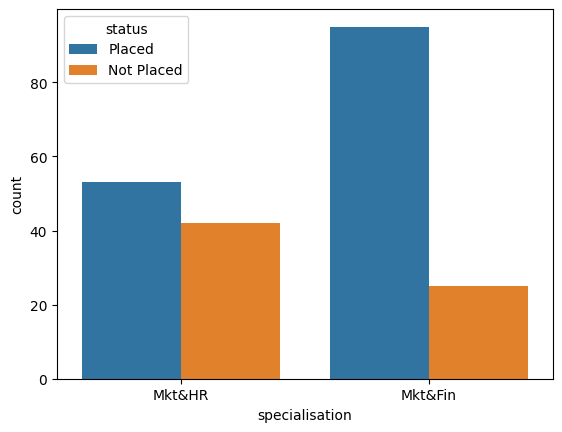

In [45]:
sns.countplot( x = 'specialisation', hue = 'status', data = df);

It is clearly visible from the above plot that Cooperate prefers and demands students who have chosen Marketing and Finance as their specialistion.

## Analysis Based on Work Experience

### Placement Status by Work Experience

In [46]:
pd.crosstab(df.workex, df.status, margins=True, normalize=True)

status,Not Placed,Placed,All
workex,,,
No,0.265116,0.390698,0.655814
Yes,0.046512,0.297674,0.344186
All,0.311628,0.688372,1.000000


- The overall placement rate for all individuals in the dataset is 68.84% (Placed) and 31.16% (Not Placed).
- Among individuals with no work experience, the placement rate is 39.07% (Not Placed) and 60.93% (Placed).
- Among individuals with work experience, the placement rate is 14.30% (Not Placed) and 85.70% (Placed).
- This indicates that individuals with work experience have a significantly higher placement rate compared to those without work experience.

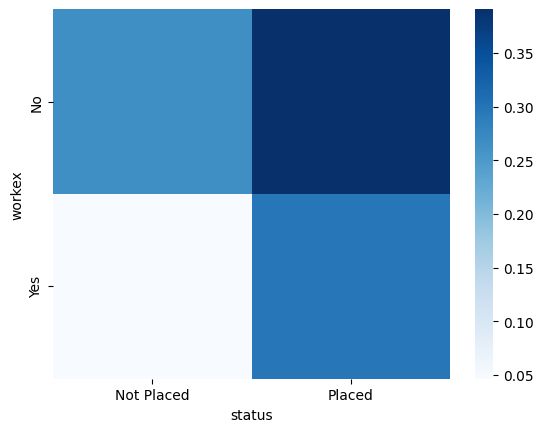

In [47]:
sns.heatmap(pd.crosstab(df.workex, df.status, normalize=True), cmap='Blues');

- The graph shows that individuals with work experience (Yes) are more likely to be those without (No).
- The ‘No’ and ‘Not Placed’ combination has the highest bar, indicating that many individuals without work experience are not placed. This could suggest that lack of work experience is a major obstacle to placement.
- The ‘Yes’ and ‘Placed’ combination is the second highest, showing that having work experience increases chances of being placed but it is not a deal breaker.

### Salaries of students with and without work experience.

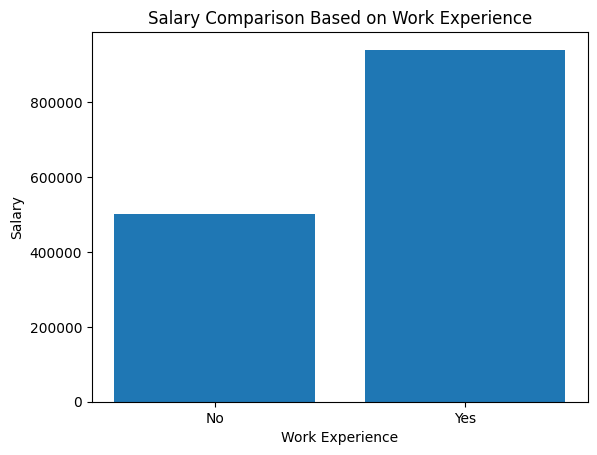

In [48]:
plt.bar(df.workex, df.salary)
plt.xlabel('Work Experience')
plt.ylabel('Salary')
plt.title('Salary Comparison Based on Work Experience');

From the above graph we can see that students who have prior work experience has more chances of demanding higher salary

## Analysis based on Gender

### Analysis of Salary based on Gender

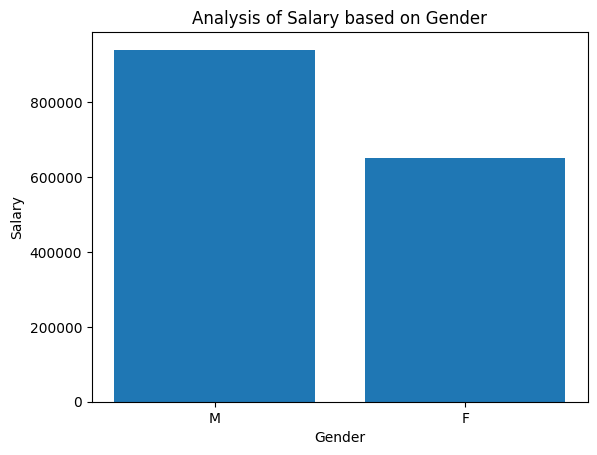

In [49]:
plt.bar(df.gender, df.salary)
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.title('Analysis of Salary based on Gender');

- The graph shows that males (M) tend to have a significantly higher salary, almost double, compared to females (F). This suggests that there might be a gender wage gap in the context this data represents.
- The highest salary, close to 800000, is earned by males. This could indicate that the highest-paying jobs are predominantly occupied by males.

### Academic performance (SSC percentage, HSC percentage, degree percentage, MBA percentage) between male and female students

#### SSC percentage

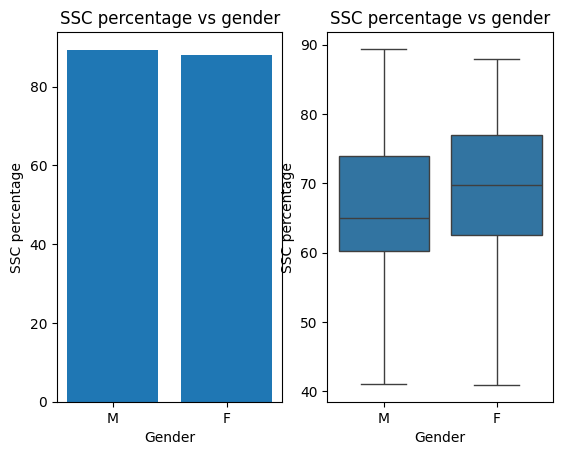

In [50]:
#let's plot a bargraph and boxplot for ssc_p vs gender
plt.subplot(1, 2, 1)
plt.bar(df.gender, df.ssc_p)
plt.xlabel('Gender')
plt.ylabel('SSC percentage')
plt.title('SSC percentage vs gender');

plt.subplot(1, 2, 2)
sns.boxplot( x = df.gender, y=df.ssc_p)
plt.xlabel('Gender')
plt.ylabel('SSC percentage')
plt.title('SSC percentage vs gender');

The graph shows that both categories Male and Female have the same percentages. This suggests that academic performance of both Male and female is similar.

### HSC percentage

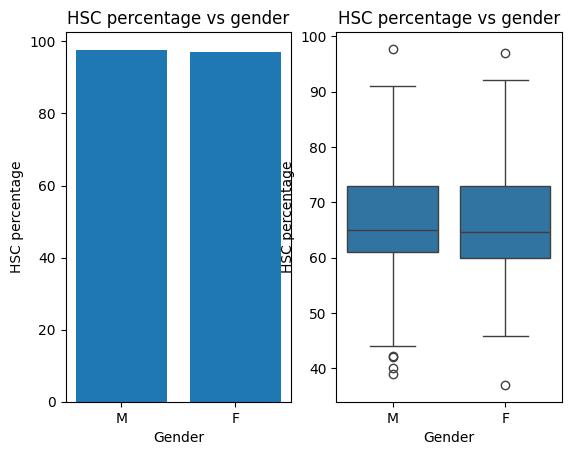

In [51]:
#let's plot a bargraph and boxplot for hsc_p vs gender
plt.subplot(1, 2, 1)
plt.bar(df.gender, df.hsc_p)
plt.xlabel('Gender')
plt.ylabel('HSC percentage')
plt.title('HSC percentage vs gender');

plt.subplot(1, 2, 2)
sns.boxplot( x = df.gender, y=df.hsc_p)
plt.xlabel('Gender')
plt.ylabel('HSC percentage')
plt.title('HSC percentage vs gender');

This graph also shows that both categories Male and Female have the same value of percentages. This suggests that academic performance of both Male and female in Higher Secondary Education is similar.

### Degree percentage

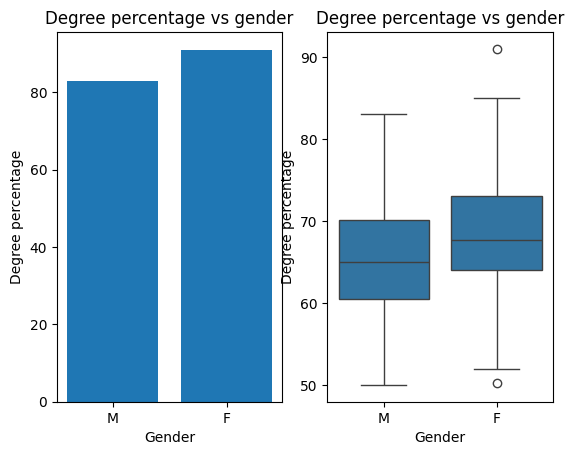

In [52]:
#let's plot a bargraph and boxplot for degree_p vs gender
plt.subplot(1, 2, 1)
plt.bar(df.gender, df.degree_p)
plt.xlabel('Gender')
plt.ylabel('Degree percentage')
plt.title('Degree percentage vs gender');

plt.subplot(1, 2, 2)
sns.boxplot( x = df.gender, y=df.degree_p)
plt.xlabel('Gender')
plt.ylabel('Degree percentage')
plt.title('Degree percentage vs gender');

Here we can see that Female students have perfomed better than Male student but the difference is not huge. This suggests that academic performance of both Male and female in Degree is also similar with females doing little better than Males.

### MBA percentage

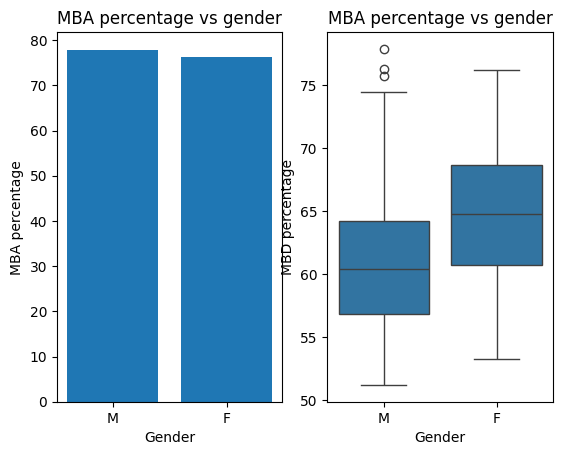

In [53]:
#let's plot a bargraph and boxplot for degree_p vs gender
plt.subplot(1, 2, 1)
plt.bar(df.gender, df.mba_p)
plt.xlabel('Gender')
plt.ylabel('MBA percentage')
plt.title('MBA percentage vs gender');

plt.subplot(1, 2, 2)
sns.boxplot( x = df.gender, y=df.mba_p)
plt.xlabel('Gender')
plt.ylabel('MBD percentage')
plt.title('MBA percentage vs gender');

In MBA we can again see that both female and male have performed equally but Male students haveing very slight upper hand (which can be treated equal).

## Analysis based on type of board (SSC board, HSC board) has any impact on placement status or salary.

### SSC board

In [59]:
df.ssc_b.value_counts()

ssc_b
Central    116
Others      99
Name: count, dtype: int64

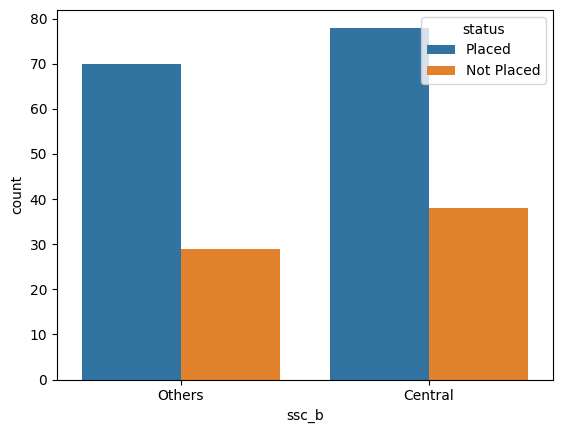

In [60]:
sns.countplot(x = 'ssc_b', hue = 'status', data = df);

- A higher number of individuals from both categories have been placed compared to those not placed. However, the “Others” category has a significantly lower number of unplaced individuals than the “Central” category.
- Central Board: For the “Central” category, approximately 70 individuals are placed, and approximately 40 individuals are not placed. This indicates a higher rate of non-placement among individuals from the Central board.
- For the “Others” category, over 70 individuals are placed, and less than 20 individuals are not placed. This shows a higher placement success rate for the “Others” category.

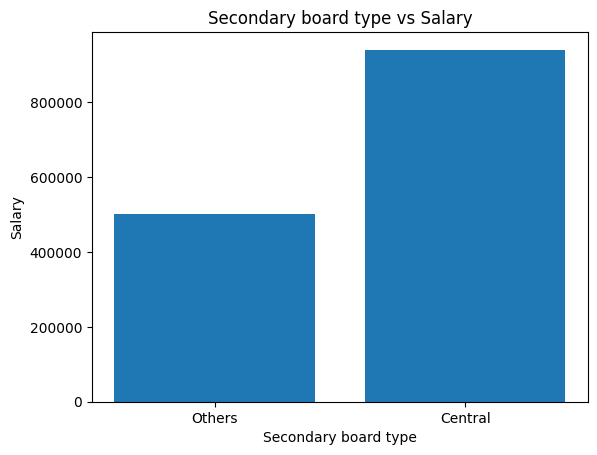

In [62]:
plt.bar(df.ssc_b, df.salary)
plt.xlabel('Secondary board type')
plt.ylabel('Salary')
plt.title('Secondary board type vs Salary');

- Individuals who attended a central board have a significantly higher average salary, almost double, compared to those from other boards.
- The salary range for the “Others” group is up to approximately 400,000, while for the “Central” group, it extends up to 800,000

Therefore it is clear that students who have opted Central board in SSC tend to get more salary

## HSC board

In [63]:
df.hsc_b.value_counts()

hsc_b
Others     131
Central     84
Name: count, dtype: int64

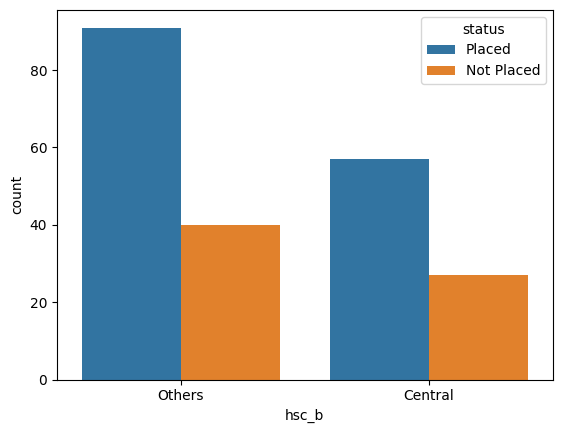

In [64]:
sns.countplot(x = 'hsc_b', hue = 'status', data = df);

- Higher Placement in Others: In the “Others” category, a significant number of individuals are placed, with a count close to 80. The number of not placed individuals is significantly lower.- 
Balanced Placement in Central: In the “Central” category, both placed and not placed counts are relatively balanced but much lower than those in the “Others” category
- This data suggests that individuals categorized under “Others” have a higher placement rate compared to those in the “Central” category..

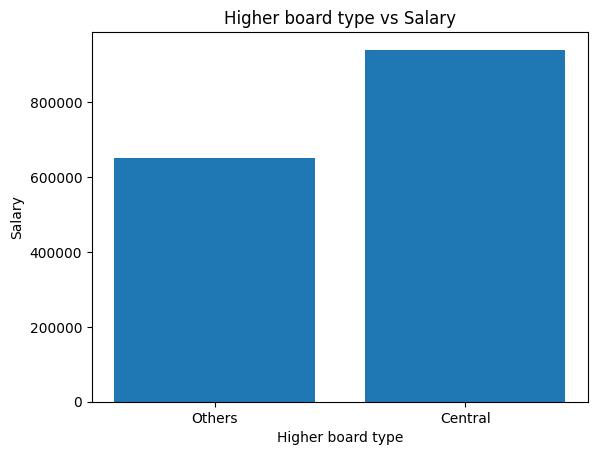

In [66]:
plt.bar(df.hsc_b, df.salary)
plt.xlabel('Higher board type')
plt.ylabel('Salary')
plt.title('Higher board type vs Salary');

- Individuals who attended a central board have a significantly higher average salary, almost double, compared to those from other boards.
- The salary range for the “Others” group is up to approximately 400,000, while for the “Central” group, it extends up to 800,000. 

#### Analyze the distribution of placements by gender

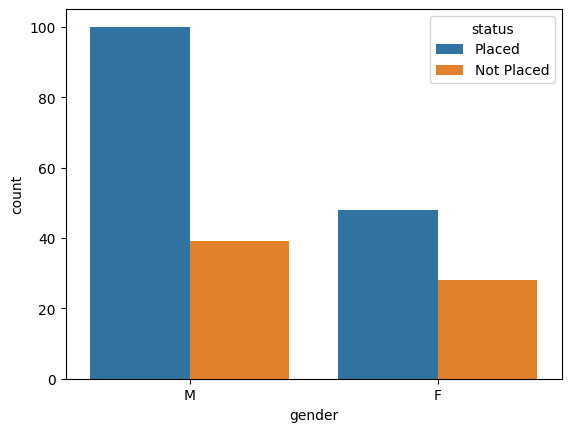

In [54]:
sns.countplot(x = 'gender', hue = 'status', data = df);

The Chart shows that higher number of males were placed compared to females. This data suggests that in this context, males have a higher placement rate than females. However, it also indicates a higher number of males were not placed compared to females.

## Final Report

This dataset consists of data of campus recruitment of a XYZ campus. 

### Analysis of salary and status based on Degree Type
There are total 215 students in this dataset and amaong them 145 of them are fom Commerce and Management Degree and 59 of them are Science and Technology degree.##### 

Commerce 
- Out of 145 commerce students 102 were placed and 43 were not placed
- The Maximum Salary obtained by a commerce is 940000 and Minimum Salary obtained is 196##### 000

Science 
- Out of 59 Science students 41 are Placed and 18 are Not Placed.
- The Maximum Salary obtained by the science is 690000 and average salary is 218627.11

### Correlation matrix 

- Strong Positive Correlation: The salary has a strong positive correlation with ssc_p (0.54). This suggests that as the ssc_p score increases, the salary tends to increase.
- Weak Positive Correlation: The salary has a weak positive correlation with and mba_P (0.22). This indicates that there might be a slight increase in salary with an increase in and mba_P, but the relationship is not very strong.
- Correlation Coefficients: Looking at the correlation coefficients between salary and other variables, we see that the highest correlation is with SSC percentage (0.538090), followed by HSC percentage (0.452569) and degree percentage (0.408371). This suggests that there is a moderate to strong positive correlation between academic performance and salary.
- Academic Performance Impact: The correlation coefficients indicate that academic performance at different levels (SSC, HSC, and degree) does have an impact on the salary one receives. This implies that individuals with higher academic scores tend to command higher salary.
- MBA Performance: The correlation coefficient between MBA performance and salary is 0.139823, indicating a weak positive correlation. This suggests that while having an MBA might be beneficial for salary, its impact might not be as pronounced as academic performance at lower levels.

### Analysis by Work Experience and Specialization

#### Specialization
By Analysis this data it was very clear that students who had choosen Marketing and Finance (Mkt&Fin) as there specialization were placed more than students whose specialization was Marketing and HR (Mkt&HR)erience.

#### Work Experience
By inspecting the Work Experience data we found out that 
- The overall placement rate for all individuals in the dataset is 68.84% (Placed) and 31.16% (Not Placed).
- Among individuals with no work experience, the placement rate is 39.07% (Not Placed) and 60.93% (Placed).
- Among individuals with work experience, the placement rate is 14.30% (Not Placed) and 85.70% (Placed).
- This indicates that individuals with work experience have a significantly higher placement rate compared to those without work experience.

### Effect on salaries of students by work experience.
It was seen that student who has prior work experience has more chance of being offered higher salary.

### Analysis based on Gender
- Analysis of Salary based on Gender - According to this data males (M) tend to have a significantly higher salary, almost double, compared to females (F). This suggests that there might be a gender wage gap in the context this data represents.

#### Academic performance (SSC percentage, HSC percentage, degree percentage, MBA percentage) between male and female students
- In Secondary education and Higher education we could see that both categories Male and Female have the same value of percentage suggesting that academic performance of both Male and female is similar.
- In Degree we could see that female students have perfomed better than Male student but the difference is not huge. This suggests that academic performance of both Male and female in Degree is also similar with females doing little better than Males.
- In MBA we can again see that both female and male have performed equally but Male students haveing very slight upper hand (which can be treated equal).

### Analysis based on type of board (SSC board, HSC board) has any impact on placement status or salary.

#### Secondary
- In Secondary education 119 student have opted "Central board" and 99 have opted "Others".
- Both central board and others board students have been placed equally.
- Individuals who attended a central board have a significantly higher average salary, almost double, compared to those from other boards.

#### Higher education
- In Higher education 131 students have opted "Others" and 84 of them have opted "Central".
- Here the “Others” category, a significant number of individuals are placed compared to "Central", with a count close to 80.
-Individuals who attended a central board have a significantly higher average salary, almost double, compared to those from other boards.
- The salary range for the “Others” group is up to approximately 400,000, while for the “Central” group, it extends up to 800,000.

### Analyze the distribution of placements by gender

According to this data it showes that higher number of males were placed compared to females. This data suggests that in this context, males have a higher placement rate than females. However, it also indicates a higher number of males were not placed compared to female. We have to consider the fact the count of Male students in this data is higher that female.

## Implications

### Factor influenced a candidate in getting placed

Based on the analysis of the dataset, the factors that influenced a candidate in getting placed include:
- Work Experience: Individuals with work experience had a significantly higher placement rate compared to those without work experience.
- Specialization: Students who chose Marketing and Finance (Mkt&Fin) as their specialization were placed more than students whose specialization was Marketing and HR (Mkt&HR).
- SSC and HSC Board: Individuals who attended a central board (both for SSC and HSC) had a significantly higher average salary and placement rate compared to those from other boards.
- Gender: Males tended to have a significantly higher salary and placement rate compared to females.

### Does percentage matters for one to get placed

Percentage does matter for one to get placed, as indicated by the analysis of percentage in MBA and degree. Generally, individuals with higher percentage in MBA and degree had a higher placement rate.

### Which degree specialization is much demanded by corporate

By analysis of this data it was very clear that students who had choosen Marketing and Finance (Mkt&Fin) as there specialization were placed more than students whose specialization was Marketing and HR (Mkt&HR).